In [4]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt


In [5]:
destination_df=pd.read_csv('Expanded_Destinations.csv')
reviews_df=pd.read_csv('Final_Updated_Expanded_Reviews.csv')
userhistory_df=pd.read_csv('Final_Updated_Expanded_UserHistory.csv')
users_df=pd.read_csv('Final_Updated_Expanded_Users.csv')


In [6]:
destination_df.head()

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,1,Taj Mahal,Uttar Pradesh,Historical,8.691906,Nov-Feb
1,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar
2,3,Jaipur City,Rajasthan,City,9.225372,Oct-Mar
3,4,Kerala Backwaters,Kerala,Nature,7.977386,Sep-Mar
4,5,Leh Ladakh,Jammu and Kashmir,Adventure,8.399822,Apr-Jun


In [7]:
len(reviews_df)

999

In [8]:
userhistory_df.head()

,HistoryID,UserID,DestinationID,VisitDate,ExperienceRating
0,1,525,760,2024-01-01,3
1,2,184,532,2024-02-15,5
2,3,897,786,2024-03-20,2
3,4,470,660,2024-01-01,1
4,5,989,389,2024-02-15,4


In [9]:
users_df.head()

,UserID,Name,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,Kavya,kavya@example.com,"Beaches, Historical",Female,1,0
1,2,Rohan,rohan@example.com,"Nature, Adventure",Male,2,2
2,3,Kavya,kavya@example.com,"City, Historical",Female,2,0
3,4,Anika,anika@example.com,"Beaches, Historical",Female,1,0
4,5,Tanvi,tanvi@example.com,"Nature, Adventure",Female,2,2


In [10]:
reviews_df.head()

,ReviewID,DestinationID,UserID,Rating,ReviewText
0,1,178,327,2,Incredible monument!
1,2,411,783,1,Loved the beaches!
2,3,927,12,2,A historical wonder
3,4,358,959,3,Incredible monument!
4,5,989,353,2,Loved the beaches!


In [11]:
reviews_destination=pd.merge(reviews_df,destination_df,on='DestinationID',how='inner')
reviews_destination

,ReviewID,DestinationID,UserID,Rating,ReviewText,Name,State,Type,Popularity,BestTimeToVisit
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb
2,3,927,12,2,A historical wonder,Goa Beaches,Goa,Beach,7.741214,Nov-Mar
3,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar
4,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar
...,...,...,...,...,...,...,...,...,...,...
994,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb
995,996,140,140,3,A historical wonder,Leh Ladakh,Jammu and Kashmir,Adventure,8.907808,Apr-Jun
996,997,823,858,5,Incredible monument!,Jaipur City,Rajasthan,City,8.501225,Oct-Mar
997,998,279,839,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,7.841207,Sep-Mar


In [12]:
reviews_destination_userhistory=pd.merge(reviews_destination,userhistory_df,on='UserID',how='inner')


In [13]:
df=pd.merge(reviews_destination_userhistory,users_df,on='UserID',how='inner')

In [14]:
df

,ReviewID,DestinationID_x,UserID,Rating,ReviewText,Name_x,State,Type,Popularity,BestTimeToVisit,HistoryID,DestinationID_y,VisitDate,ExperienceRating,Name_y,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar,79,175,2024-01-01,3,Pooja,pooja@example.com,"City, Historical",Female,1,1
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb,834,894,2024-03-20,2,Karan,karan@example.com,"City, Historical",Male,1,1
2,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar,998,660,2024-02-15,4,Ritvik,ritvik@example.com,"Nature, Adventure",Male,1,1
3,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,202,894,2024-01-01,5,Isha,isha@example.com,"Nature, Adventure",Female,2,0
4,6,473,408,4,A historical wonder,Jaipur City,Rajasthan,City,8.138558,Oct-Mar,331,403,2024-01-01,2,Ishaan,ishaan@example.com,"City, Historical",Male,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,138,131,2024-03-20,1,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
989,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,643,761,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
990,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,454,113,2024-01-01,2,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2
991,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,556,128,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2


In [15]:
df.shape

(993, 20)

In [16]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

,0
ReviewID,0
DestinationID_x,0
UserID,0
Rating,0
ReviewText,0
Name_x,0
State,0
Type,0
Popularity,0
BestTimeToVisit,0


<ipython-input-18-ae0b29396b90>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Popularity',y='Name',data=destination_df.sort_values(by='Popularity',ascending=False),palette='viridis')


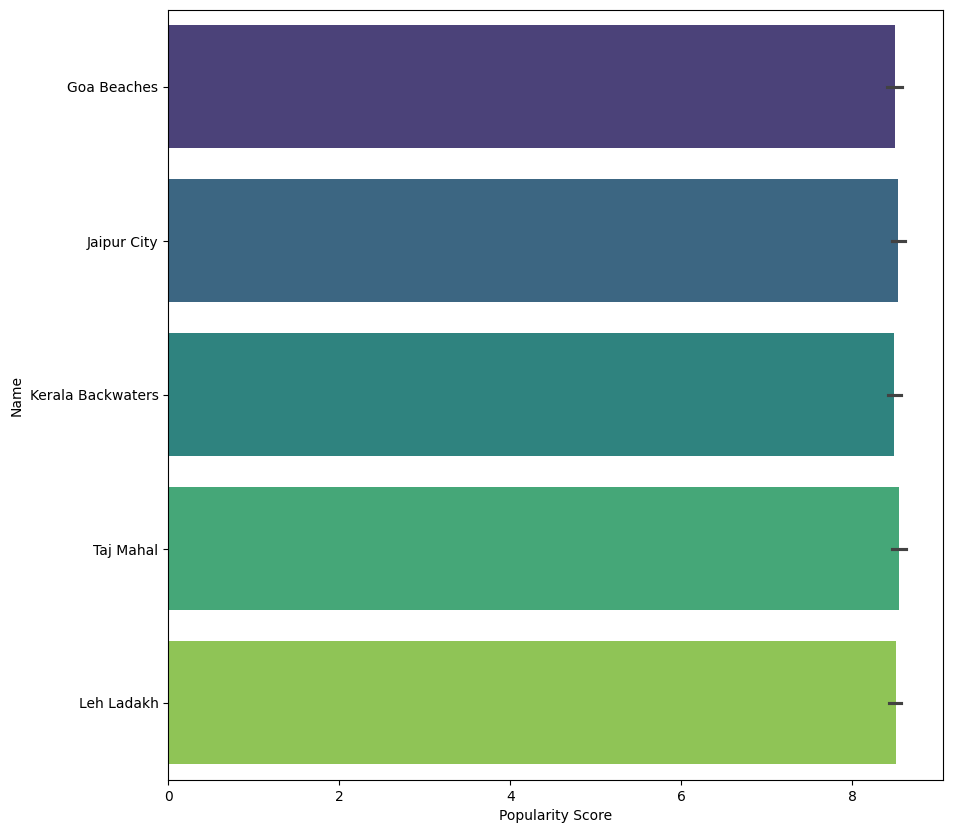

In [18]:
plt.figure(figsize=(10,10))
sns.barplot(x='Popularity',y='Name',data=destination_df.sort_values(by='Popularity',ascending=False),palette='viridis')
plt.xlabel('Popularity Score')
plt.show()

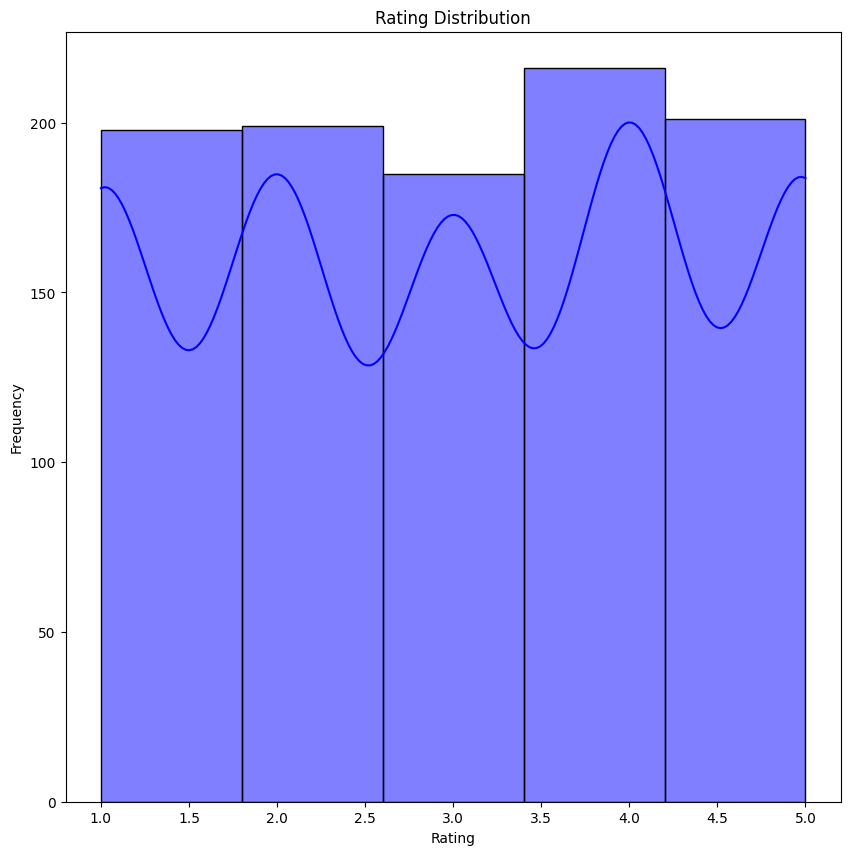

In [19]:
plt.figure(figsize=(10,10))
sns.histplot(reviews_df['Rating'],bins=5,kde=True,color='blue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [22]:
user_item_matrix=userhistory_df.pivot(index='UserID',columns='DestinationID',values='ExperienceRating')
user_item_matrix.fillna(0,inplace=True)

user_similarity=cosine_similarity(user_item_matrix)

In [87]:
def collaborative_recommend(user_id,user_similarity,user_item_matrix,destination_df):
  similar_users=user_similarity[user_id-1]

  similar_users_idx=np.argsort(similar_users)[::-1][1:6]

  similar_user_ratings=user_item_matrix.iloc[similar_users_idx].mean(axis=0)


  recommended_destinations_ids = similar_user_ratings.sort_values(ascending=False).head(5).index

  recommendations = destination_df[destination_df['DestinationID'].isin(recommended_destinations_ids)][[
            'DestinationID', 'Name', 'State', 'Type', 'Popularity', 'BestTimeToVisit']]
  return recommendations

In [35]:
collaborative_recommendations=collaborative_recommend(11,user_similarity,user_item_matrix,destination_df)

In [36]:
collaborative_recommendations

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
5,6,Taj Mahal,Uttar Pradesh,Historical,7.648950,Nov-Feb
367,368,Jaipur City,Rajasthan,City,8.008252,Oct-Mar
519,520,Leh Ladakh,Jammu and Kashmir,Adventure,8.521876,Apr-Jun
784,785,Leh Ladakh,Jammu and Kashmir,Adventure,9.366933,Apr-Jun
969,970,Leh Ladakh,Jammu and Kashmir,Adventure,9.013101,Apr-Jun


In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

data=df.copy()


In [89]:


features = ['Name_x', 'State', 'Type', 'BestTimeToVisit', 'Preferences', 'Gender', 'NumberOfAdults', 'NumberOfChildren']
target = 'Popularity'

In [41]:
data[features]

,Name_x,State,Type,BestTimeToVisit,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,Jaipur City,Rajasthan,City,Oct-Mar,"City, Historical",Female,1,1
1,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"City, Historical",Male,1,1
2,Jaipur City,Rajasthan,City,Oct-Mar,"Nature, Adventure",Male,1,1
3,Kerala Backwaters,Kerala,Nature,Sep-Mar,"Nature, Adventure",Female,2,0
4,Jaipur City,Rajasthan,City,Oct-Mar,"City, Historical",Male,2,0
...,...,...,...,...,...,...,...,...
988,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"Beaches, Historical",Male,2,0
989,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"Beaches, Historical",Male,2,0
990,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"Beaches, Historical",Male,2,2
991,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"Beaches, Historical",Male,2,2


In [42]:
label_encoders = {}
for col in features:
    if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
            label_encoders[col] = le

In [45]:
x=data[features]
y=data[target]

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [77]:
 import tensorflow as tf
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import Dense
 from tensorflow.keras.optimizers import Adam


 model = Sequential()


 model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))


 model.add(Dense(64, activation='relu'))
 model.add(Dense(32, activation='relu'))


 model.add(Dense(1))


 model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])


 model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:

history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 59.0823 - mae: 7.5892 - val_loss: 11.5723 - val_mae: 2.9970
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.1006 - mae: 2.4446 - val_loss: 3.0821 - val_mae: 1.5074
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9928 - mae: 1.3609 - val_loss: 1.6381 - val_mae: 1.0402
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7849 - mae: 1.0647 - val_loss: 1.0410 - val_mae: 0.8163
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9897 - mae: 0.8018 - val_loss: 0.8158 - val_mae: 0.7026
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6186 - mae: 0.6117 - val_loss: 0.7421 - val_mae: 0.7012
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5823 - mae: 0.6175 - val_loss: 0.5926 - val_mae: 0.6252
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4954 - mae: 0.5687 - val_loss: 0.5050 - val_mae: 0.5843
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3872 - ma

In [80]:

y_pred = model.predict(x_test)


comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(comparison.head())


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
       Actual  Predicted
918  8.295686   8.821972
525  8.013553   8.657471
567  8.133818   8.204338
656  7.890657   8.448439
915  8.989188   8.436656


In [81]:
y_pred = model.predict(x_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error: 0.33
R² Score: -0.01


In [83]:
import pandas as pd


def recommend_destinations(user_input, model, label_encoders, features, data, destination_df):

    encoded_input = {}
    for feature in features:
        if feature in label_encoders:
            encoded_input[feature] = label_encoders[feature].transform([user_input[feature]])[0]
        else:
            encoded_input[feature] = user_input[feature]


    input_df = pd.DataFrame([encoded_input])


    predicted_popularity = model.predict(input_df)[0]


    predicted_popularity_value = predicted_popularity[0]


    recommendations = destination_df[(destination_df['Popularity'] >= predicted_popularity_value - 2) &
                                      (destination_df['Popularity'] <= predicted_popularity_value + 2)][[
                                          'DestinationID', 'Name', 'State', 'Type', 'Popularity', 'BestTimeToVisit']]

    return recommendations, predicted_popularity_value

In [85]:
user_input = {
    'Name_x': 'Jaipur City',
    'Type': 'City',
    'State': 'Rajasthan',
    'BestTimeToVisit': 'Oct-Mar',
    'Preferences': 'City, Historical',
    'Gender': 'Female',
    'NumberOfAdults': 2,
    'NumberOfChildren': 1,
}


recommendations, predicted_popularity = recommend_destinations(user_input, model, label_encoders, features, data, destination_df)


print(f"Predicted Popularity Score: {predicted_popularity:.2f}")
print("\nRecommended Destinations:")
print(recommendations)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Popularity Score: 8.41

Recommended Destinations:
     DestinationID               Name              State        Type  \
0                1          Taj Mahal      Uttar Pradesh  Historical   
1                2        Goa Beaches                Goa       Beach   
2                3        Jaipur City          Rajasthan        City   
3                4  Kerala Backwaters             Kerala      Nature   
4                5         Leh Ladakh  Jammu and Kashmir   Adventure   
..             ...                ...                ...         ...   
995            996          Taj Mahal      Uttar Pradesh  Historical   
996            997        Goa Beaches                Goa       Beach   
997            998        Jaipur City          Rajasthan        City   
998            999  Kerala Backwaters             Kerala      Nature   
999           1000         Leh Ladakh  Jammu and Kashmir   Adventure   

     Popularity BestTimeToVisit  
0  

In [86]:
import pickle

pickle.dump(model, open("model.pkl",'wb'))
pickle.dump(label_encoders, open("label_encoders.pkl",'wb'))